#**`COVID19 PREDICTION PROJECT`**





## **Business objective**

Our project aims to answer the following questions:

     I.How effective is our predictive model in distinguishing between COVID-19 positive and negative cases?

     II.Is it possible to make an accurate prediction of a COVID-19 infection based on symptoms and other relevant factors?

     III.Can we identify any patterns  in COVID-19 cases over time?

     IV.which symptoms are the strongest indicators of a person being COVID-19 positive?



Project Proposal

What questions do I want to answer?

1.   Why is your proposal important in today’s world? How predicting a disease
     accurately can improve medical treatment?

        
   

* Our proposal to use machine learning for predicting COVID-19 is crucial in today's world. It addresses the need to accurately and timely identify individuals who are at risk of spreading the disease. By using advanced analysis, we can improve the effectiveness of screening and reduce the burden of treatment. This leads to early diagnosis, timely treatment, and allocation of appropriate resources, ultimately reducing the spread of the disease.

* In the current scenario of infectious diseases like COVID-19, predicting the disease accurately can help save lives and contribute to public health. It aids in identifying individuals who are at a higher risk of contracting COVID-19, which can guide medical treatment decisions. This includes prioritizing testing and monitoring, and allocating resources efficiently to ensure better medical care.



  



         

2.  How is it going to impact the medical field when it comes to effective
  screening and reducing health care burden.


* An accurate disease prediction model based on machine learning can have a significant impact on the medical field. It can improve screening efficiency by identifying high-risk individuals at an early stage, optimize testing strategies, and allocate healthcare resources effectively. This can lead to reduced healthcare costs through timely intervention, increased strategic planning, and informed public health decisions. Ultimately, it can help improve patient outcomes.





3.  If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.

*  The proposed method utilizes machine learning to predict diseases, address gaps in early diagnosis, provide public access to information about different diseases, offer valuable insights, improve regulatory control, promote personalized medicine, and enhance public health. Its flexibility has made it useful in solving future health problems in a variety of conditions.













##**1.Importing libraries**

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [182]:
# Import the 'warnings' module to handle warning messages
import warnings
warnings.filterwarnings("ignore")

##**2.Get the data**

In [183]:
# Load the dataset
df_raw=pd.read_csv("/content/corona_tested_006.csv")

In [184]:
# Create a deep copy of the original DataFrame (df_raw)
df=df_raw.copy()

In [185]:
# Select the target variable
target_variable = df['Corona']


# Verify the extracted target variable
print(target_variable)

0         negative
1         positive
2         positive
3         negative
4         negative
            ...   
278843    positive
278844    negative
278845    negative
278846    negative
278847    negative
Name: Corona, Length: 278848, dtype: object


# **Initial Hypothesis (or hypotheses)**

 our initial hypotheses are as follows:



*   Hypothesis: There is a correlation between  symptoms (such as cough, fever) and the presence of COVID-19.
*   Assumption: Patients who test positive for COVID-19 are more likely to experience these symptoms than those who test negative.



*   Hypothesis: Gender may be a factor in determining the susceptibility to COVID-19.
*  Assumption: There may be differences in the spread of COVID-19 cases between males and females.


*   Hypothesis: Age plays a  role in the likelihood of  COVID-19 cases.


*  Assumption:Individuals who are older and have contracted COVID-19 are at a greater risk of testing positive for the virus.









# **Data analysis approach**



1.   What approach are you going to take in order to prove or disprove your  
    hypothesis?

*   To prove or disprove the hypothesis, that machine learning models can accurately predict COVID-19 outcomes, the approach involves such as data preprocessing, exploratory data analysis, feature engineering, temporal splitting of data, model selection (such as Decision Trees, Random Forests, SVM, Logistic Regression, etc.), training, validation, model comparison, and cross-validation. By following this approach, we can either prove or disprove the hypothesis that machine learning models are effective in predicting COVID-19 outcomes.




2.   What feature engineering techniques will be relevant to your project?

*   In order to enhance the quality and relevance of features used in our project, we will need to employ some feature engineering techniques. These techniques will include encoding categorical variables using one-hot encoding or label encoding, scaling numerical variables, handling missing data, and checking for outliers. By applying these techniques, we can improve the accuracy and effectiveness of our models.




3.  Please justify your data analysis approach.

*  Our approach to analyzing data is valid because Exploratory Data Analysis (EDA) helps us to gain a better understanding of the data, its characteristics, and any patterns or trends by visually exploring  it. By conducting statistical analyses and hypothesis testing, we can provide evidence to prove or disprove our initial hypotheses.





4.   Identify important patterns in your data using the EDA approach to justify your findings.

*   Using the EDA approach, we will visualize the data using plots and charts(univariate,bivariate,multivariate) , calculate summary statistics, identify correlations between variables. By doing this, we can find important patterns or trends in the data





##**3.Basic Exploration**

In [186]:
# Display the first 5 rows of the DataFrame (df)
df.head()



,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [187]:
# Display the last 5 rows of the DataFrame (df)
df.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [188]:
# Get the dimensions of the DataFrame (df)
df.shape

(278848, 11)

In [189]:
# Display information about the DataFrame (df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


This Datafame contains 10 categorical columns and 1 numerical column.

In [190]:
# Get statistical summary of the dataset
df.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


In [191]:
# Count the number of unique values in each column of the DataFrame (df)
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [192]:
# Print the unique value for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Ind_ID: [     1      2      3 ... 278846 278847 278848]
Unique values in Test_date: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Unique values in Cough_symptoms: ['TRUE' 'FALSE' 'None' False True]
Unique values in Fever: ['FALSE' 'TRUE' 'None' False True]
Unique values in Sore_throat: ['TRUE' 'FALSE' 'None' False True]
Unique values in Shortness_of_br

In [193]:
# List of columns to convert
columns_to_convert = ['Fever', 'Cough_symptoms', 'Headache','Shortness_of_breath','Sore_throat','Age_60_above','Sex','Corona']

# Iterate through each column and replace specific values
for column in columns_to_convert:
    df[column] = df[column].replace({'TRUE': True, 'FALSE': False, 'None':np.nan})

In [194]:
# Count the number of unique values in each column of the DataFrame (df)
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [195]:
# Count the number of missing values in each column of the DataFrame (df)
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

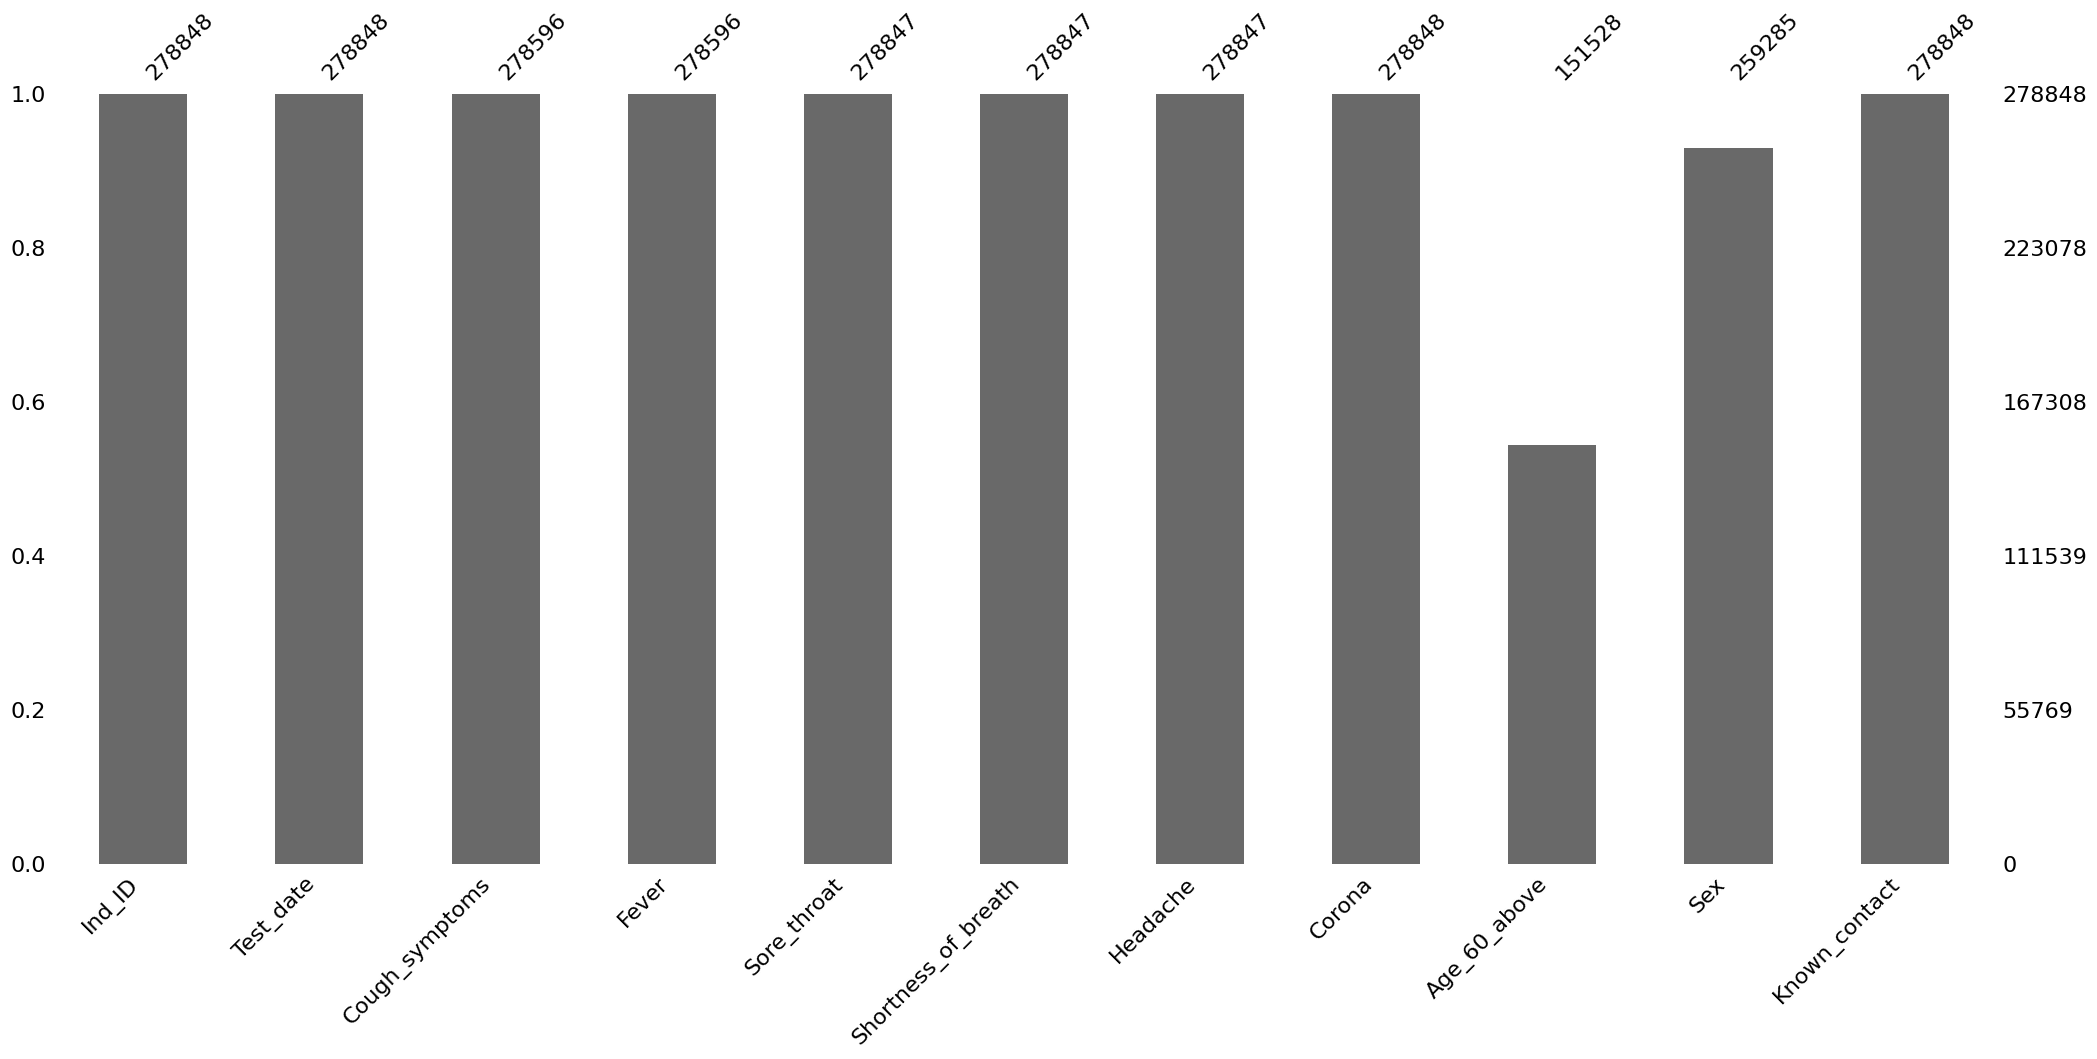

In [196]:
# Visualize missing data with a bar chart
msno.bar(df)
plt.show()

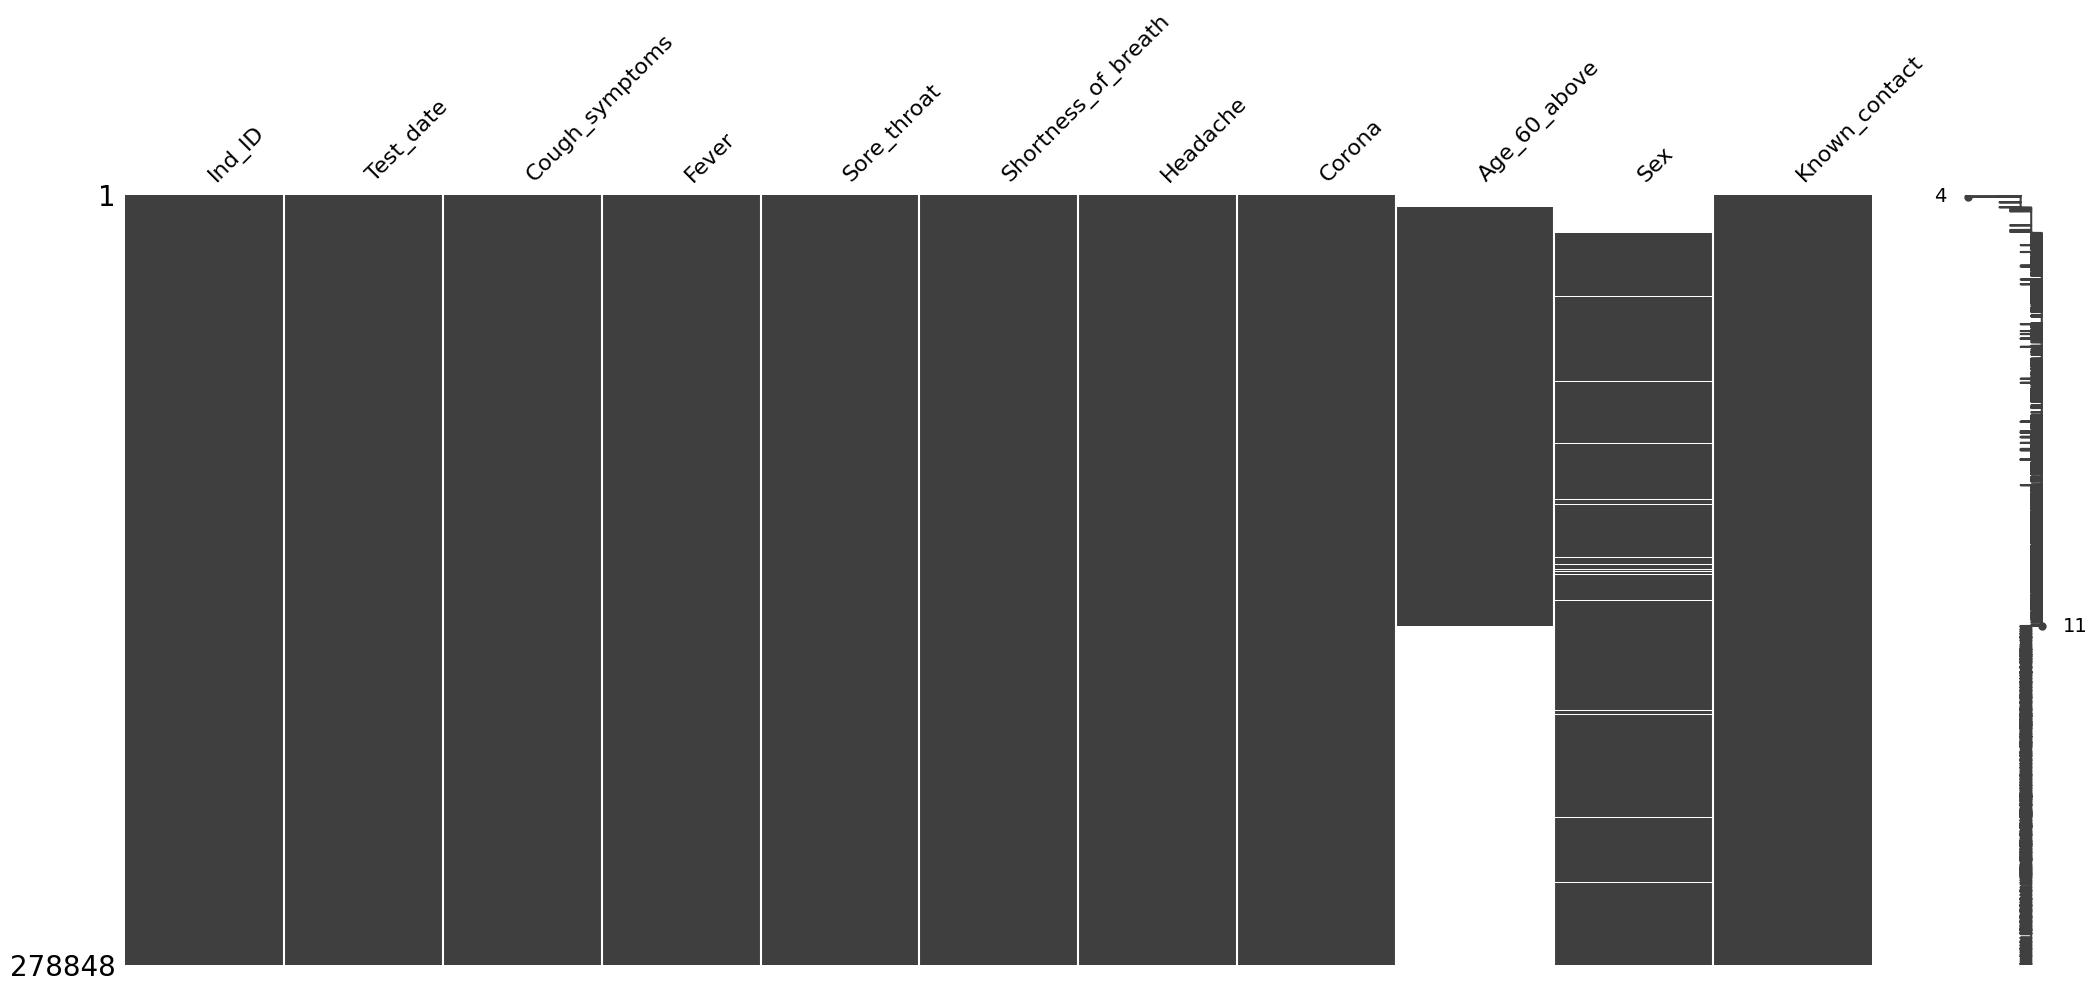

In [197]:
# Visualize missing data with a matrix
msno.matrix(df)
plt.show()

#**4.EDA**

In [198]:
# Count the number of duplicated rows in the DataFrame (df)
df.duplicated().sum()

0

# **4.1Dealing With Missing Values**








In [199]:
# Count the number of missing values in each column of the DataFrame (df)
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [200]:
# Check the dimension of the dataframe(df)
df.shape

(278848, 11)

In [201]:
# Drop rows where any of the specified columns have missing values
df = df.dropna(subset=['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache'])

In [202]:
# Fill missing values in the 'Sex' and 'Age_60_above' column with the mode (most frequent value)
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)
df['Age_60_above'].fillna(df['Age_60_above'].mode()[0], inplace=True)


In [203]:
# Now check the missing values
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [204]:
# Check the first 5 rows
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,No,female,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,No,female,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,No,female,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,No,female,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,No,female,Contact with confirmed


In [205]:
# Check the dimension of the dataframe(df)
df.shape

(278594, 11)

#**4.2 Visual Exploration**

# 4.2.1 Univariate Analysis

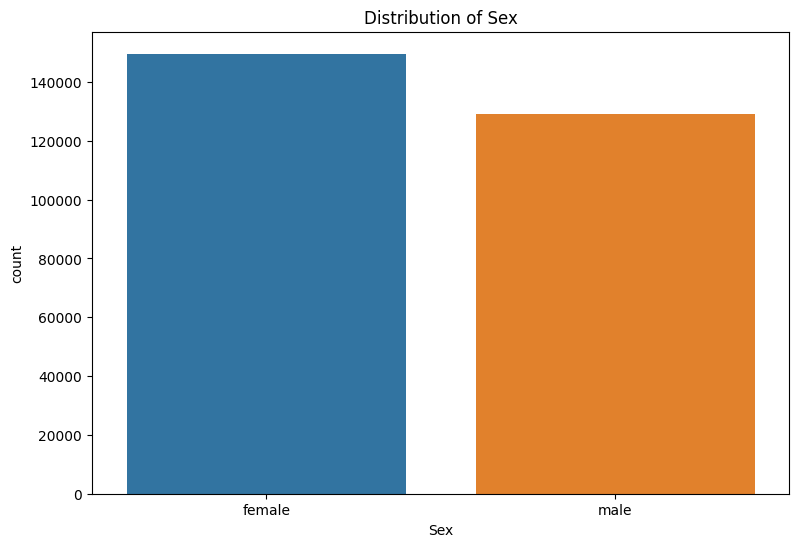

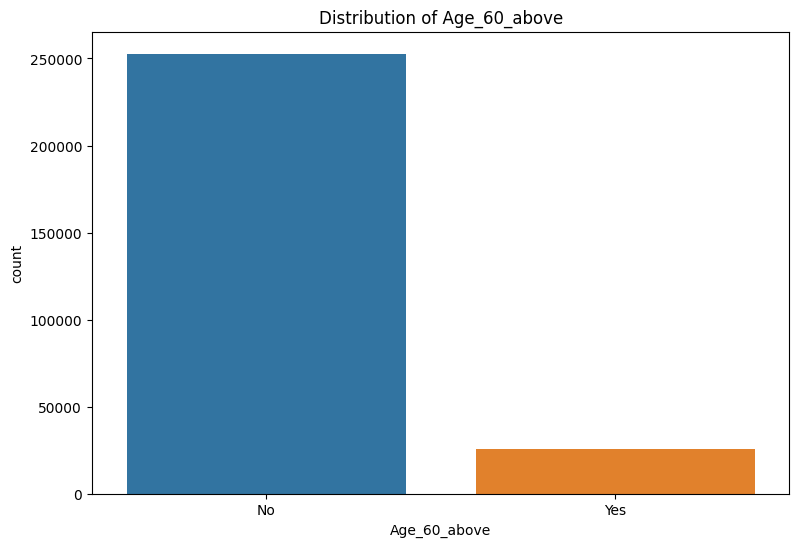

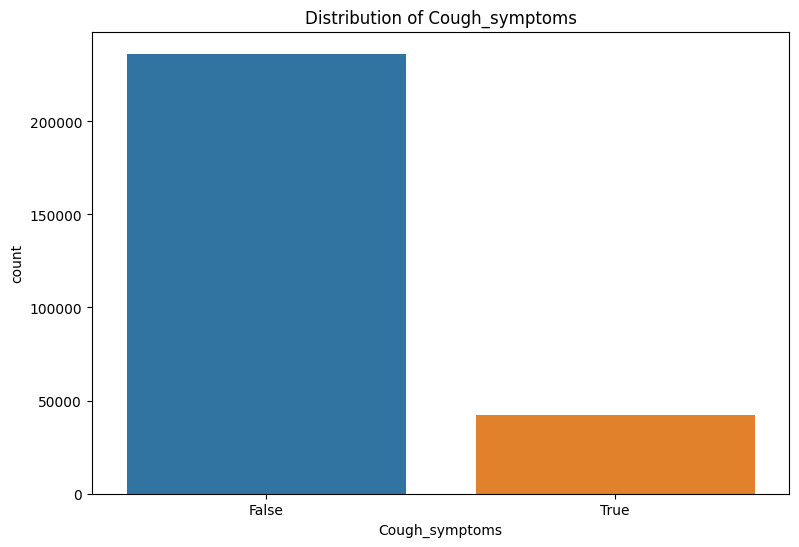

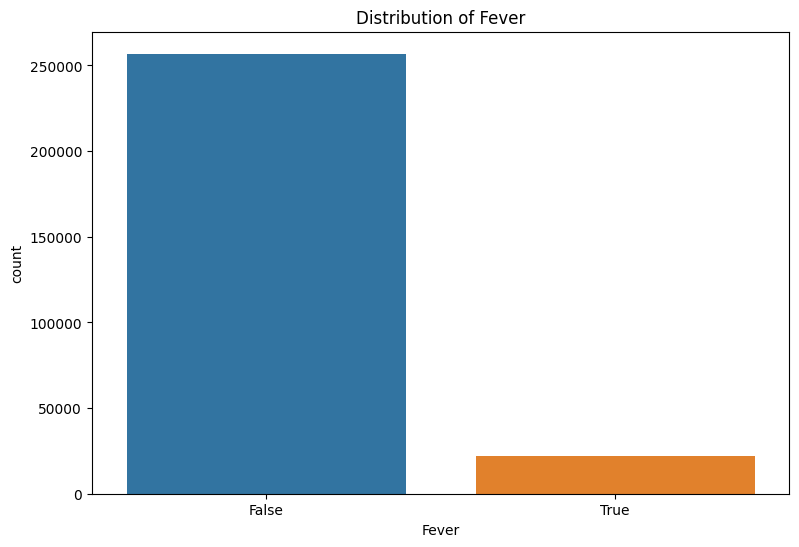

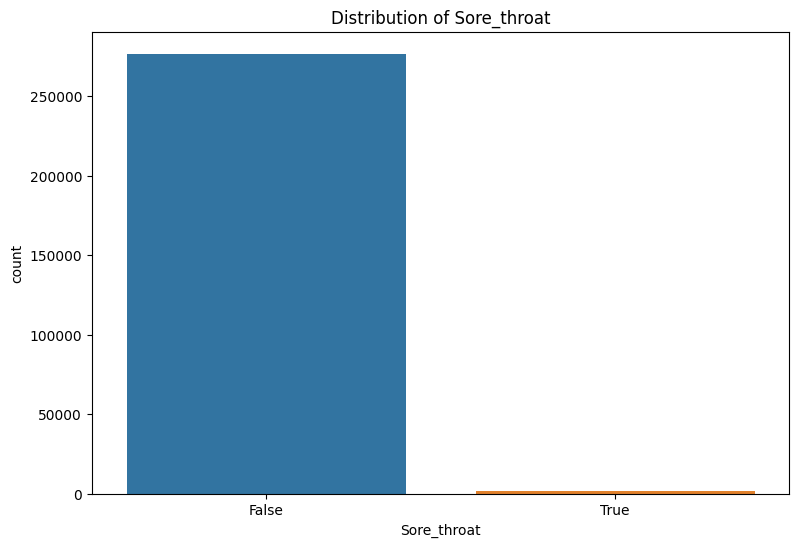

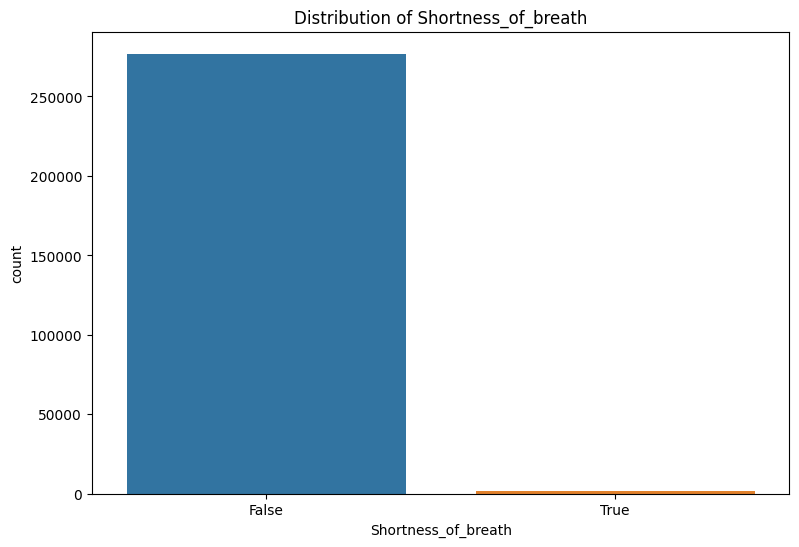

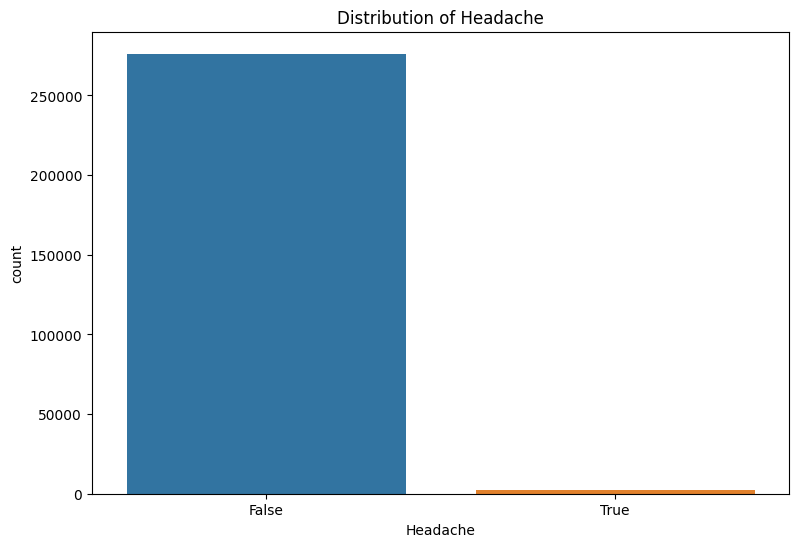

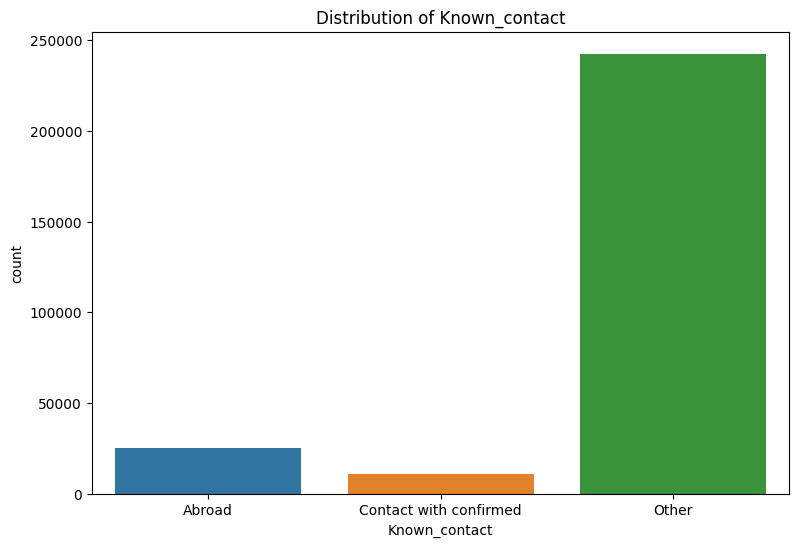

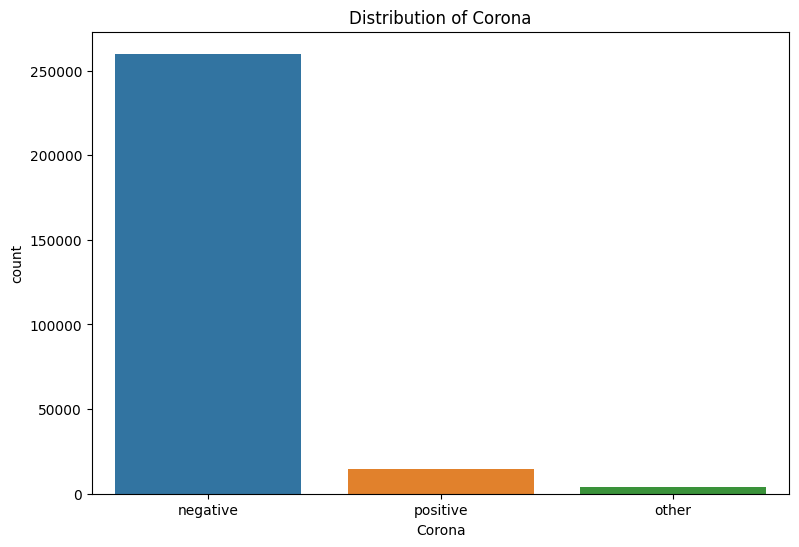

In [206]:
# Perform univariate analysis for selected features
column_names = ['Sex', 'Age_60_above', 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact', 'Corona']
# Create count plots for each feature
for column in column_names:
        plt.figure(figsize=(9, 6))
        sns.countplot(data=df, x=column)
        plt.title(f'Distribution of {column}')
        plt.show()


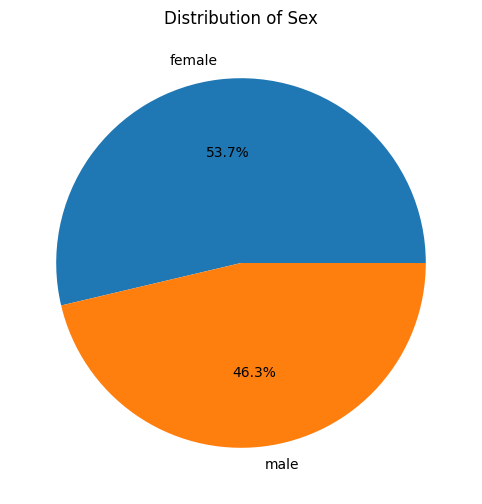

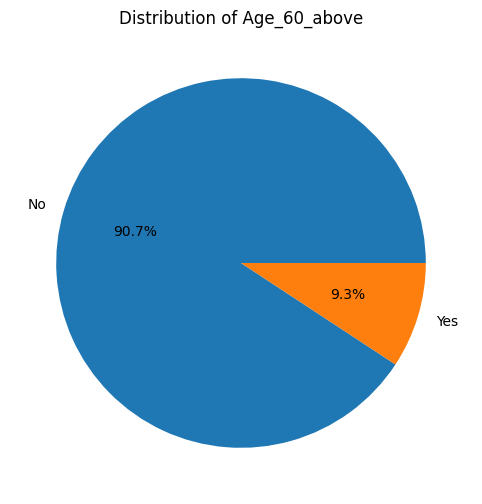

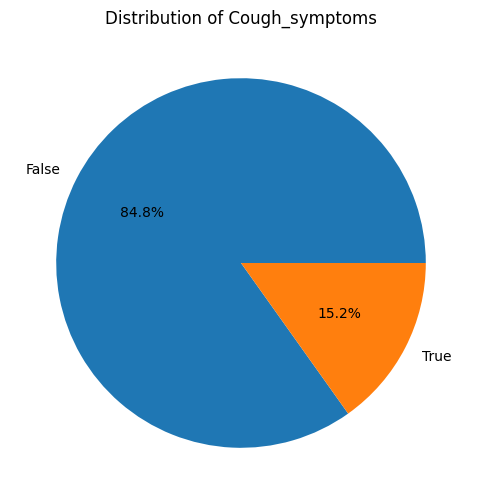

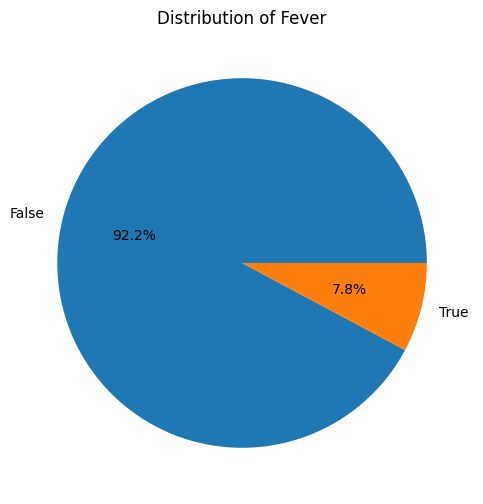

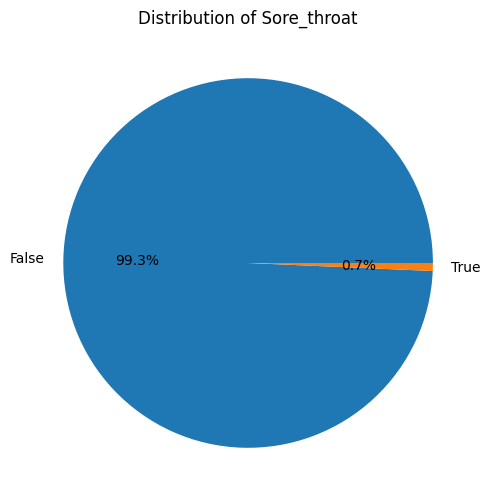

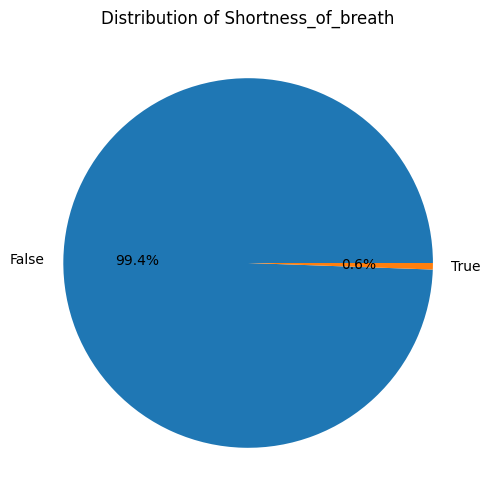

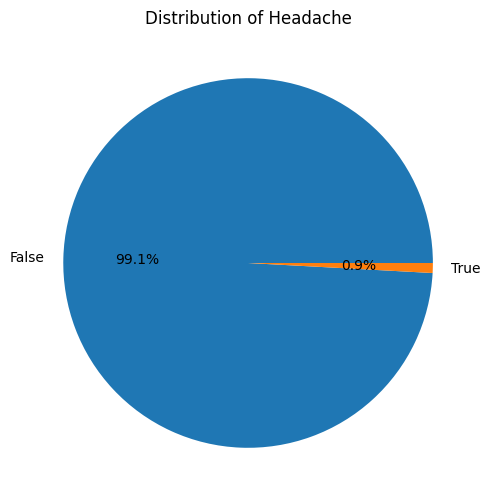

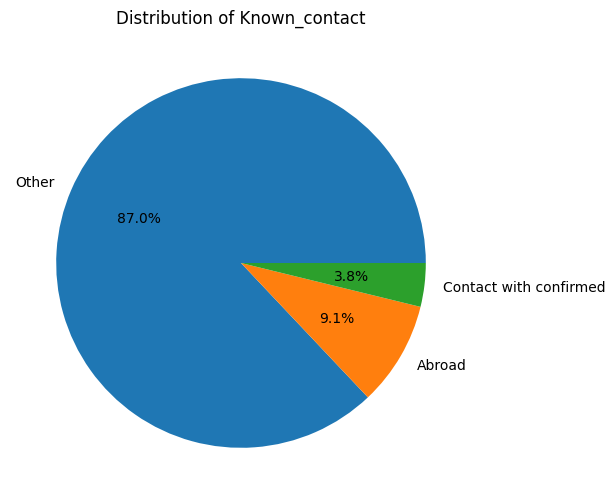

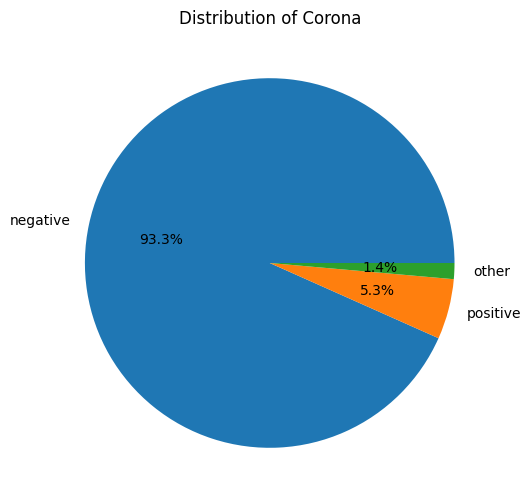

In [207]:
# Create pie charts for each feature
for column in column_names:
    plt.figure(figsize=(9, 6))
    # Count the occurrences of each category
    counts = df[column].value_counts()
    # Create a pie chart using the counts
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {column}')
    plt.show()

#4.2.2 Bivariate analysis

<Figure size 900x800 with 0 Axes>

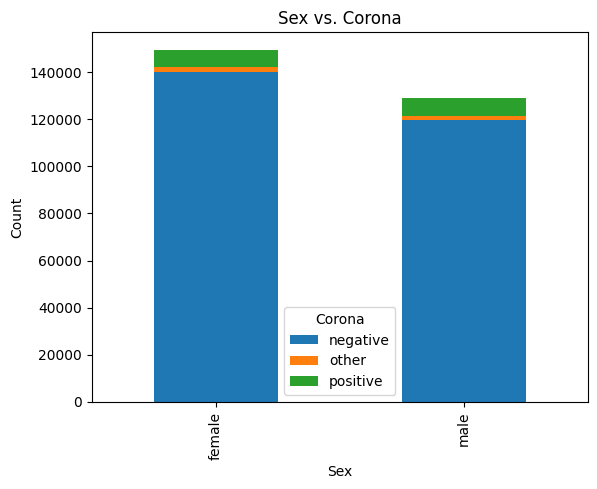

<Figure size 900x800 with 0 Axes>

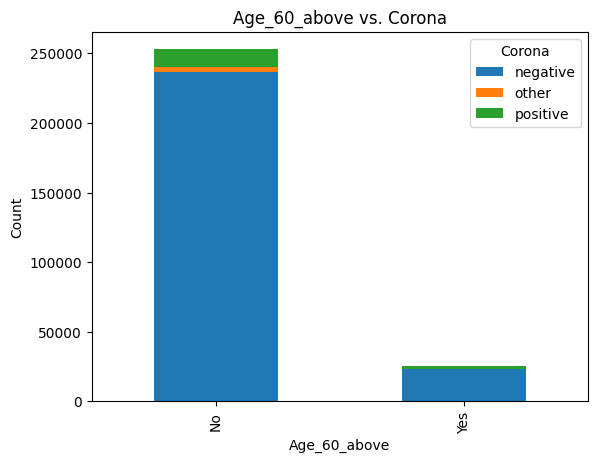

<Figure size 900x800 with 0 Axes>

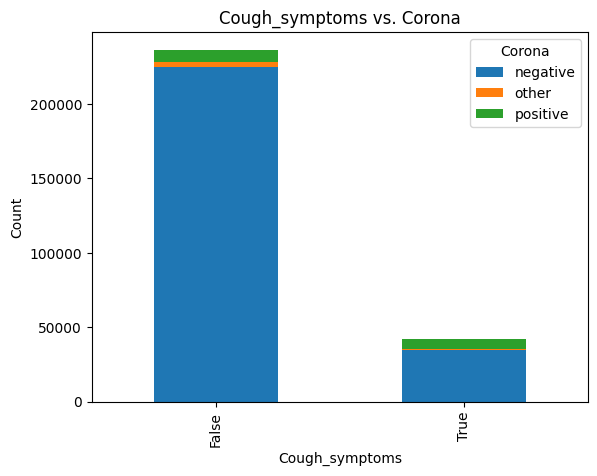

<Figure size 900x800 with 0 Axes>

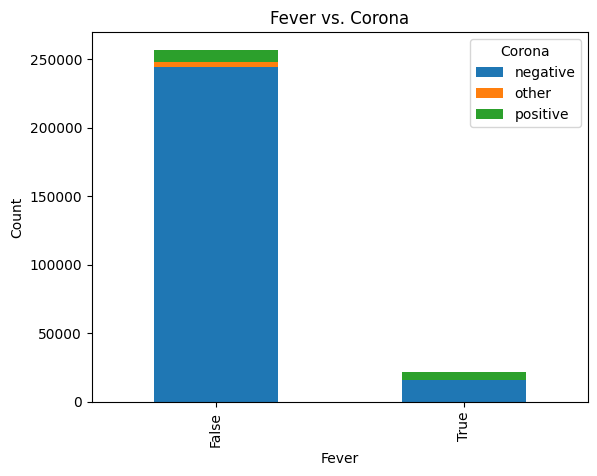

<Figure size 900x800 with 0 Axes>

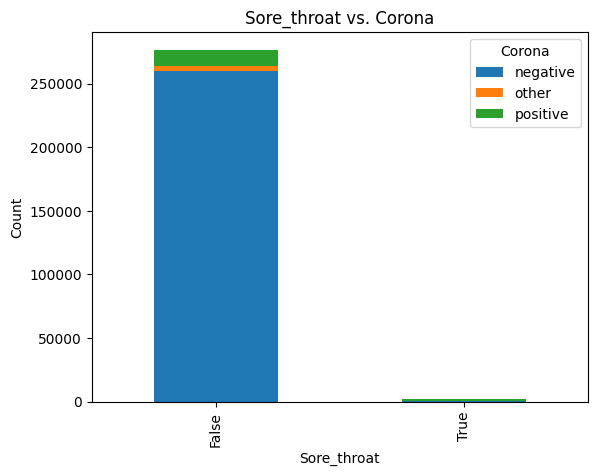

<Figure size 900x800 with 0 Axes>

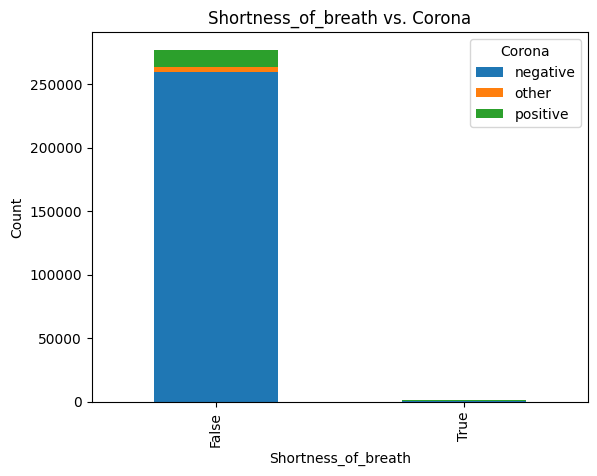

<Figure size 900x800 with 0 Axes>

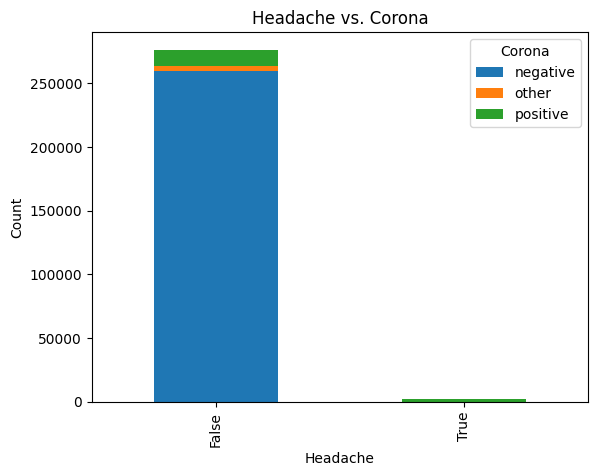

<Figure size 900x800 with 0 Axes>

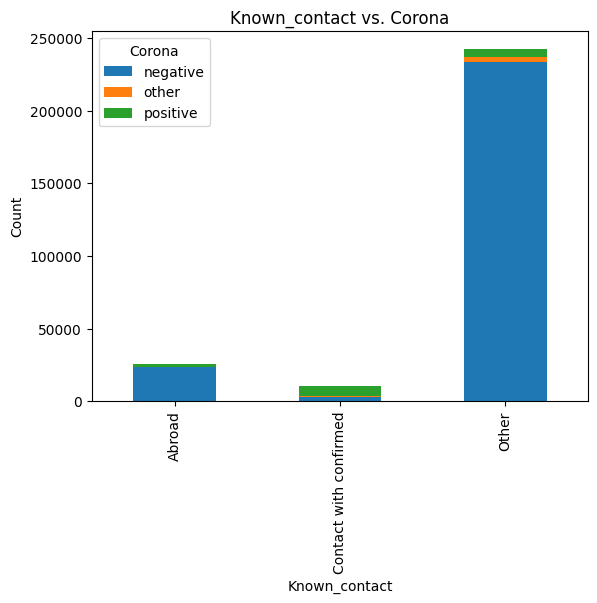

In [208]:
# Grouped bar plot for categorical variables
column_names = ['Sex', 'Age_60_above', 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact']

for column in column_names:
    plt.figure(figsize=(9, 8))
    grouped_data = df.groupby([column, 'Corona']).size().unstack()
    grouped_data.plot(kind='bar', stacked=True)
    plt.title(f'{column} vs. Corona')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

<Figure size 1200x800 with 0 Axes>

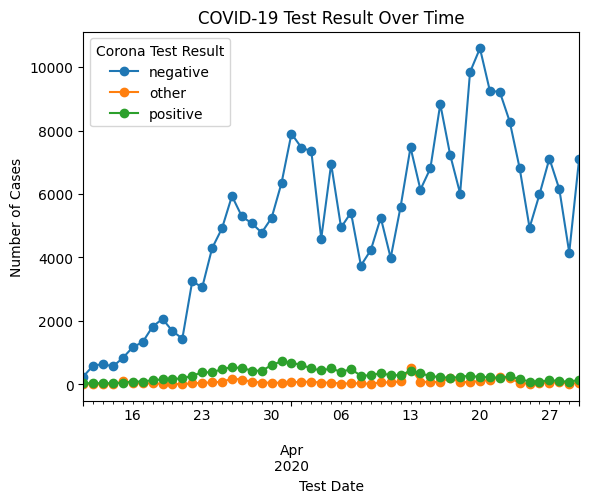

In [209]:
# Convert 'Test_date' column to datetime format with the correct format "%d-%m-%Y"
df['Test_date'] = pd.to_datetime(df['Test_date'], format="%d-%m-%Y")

# Group the data by 'Test_date' and 'Corona', and count the occurrences
cases_by_test_date = df.groupby(['Test_date', 'Corona']).size().unstack()

# Plot the line plot showing the number of corona cases over time
plt.figure(figsize=(12, 8))
cases_by_test_date.plot(kind='line', marker='o')
plt.xlabel('Test Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Test Result Over Time')
plt.legend(title='Corona Test Result')
plt.show()

#**4.3 Drop Features**

In [210]:
# Drop the suggested features
df = df.drop(['Ind_ID'], axis=1)

# Verify the updated DataFrame
print(df.head())

   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache  \
0 2020-03-11           True  False        True               False    False   
1 2020-03-11          False   True       False               False    False   
2 2020-03-11          False   True       False               False    False   
3 2020-03-11           True  False       False               False    False   
4 2020-03-11           True  False       False               False    False   

     Corona Age_60_above     Sex           Known_contact  
0  negative           No  female                  Abroad  
1  positive           No  female                  Abroad  
2  positive           No  female                  Abroad  
3  negative           No  female                  Abroad  
4  negative           No  female  Contact with confirmed  


'Ind_ID' column is not useful for prediction.

#**4.4 Label encoding & One Hot Encoding**

In [211]:
categorical_cols = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above']

# Apply label encoding to  categorical columns
label_encoder = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda x: label_encoder.fit_transform(x.astype(str)))

# Perform one-hot encoding for Sex and Known_contact features
df= pd.get_dummies(df, columns=['Sex', 'Known_contact'])

# Encode the target variable 'Corona' using one hot encoding
df= pd.get_dummies(df, columns=['Corona'], prefix='Corona')

# Display the transformed DataFrame
print(df.head())


   Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0 2020-03-11               1      0            1                    0   
1 2020-03-11               0      1            0                    0   
2 2020-03-11               0      1            0                    0   
3 2020-03-11               1      0            0                    0   
4 2020-03-11               1      0            0                    0   

   Headache  Age_60_above  Sex_female  Sex_male  Known_contact_Abroad  \
0         0             0           1         0                     1   
1         0             0           1         0                     1   
2         0             0           1         0                     1   
3         0             0           1         0                     1   
4         0             0           1         0                     0   

   Known_contact_Contact with confirmed  Known_contact_Other  Corona_negative  \
0                                     0  

In [212]:
df.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex_female',
       'Sex_male', 'Known_contact_Abroad',
       'Known_contact_Contact with confirmed', 'Known_contact_Other',
       'Corona_negative', 'Corona_other', 'Corona_positive'],
      dtype='object')

#**4.5 Correlation Analysis**

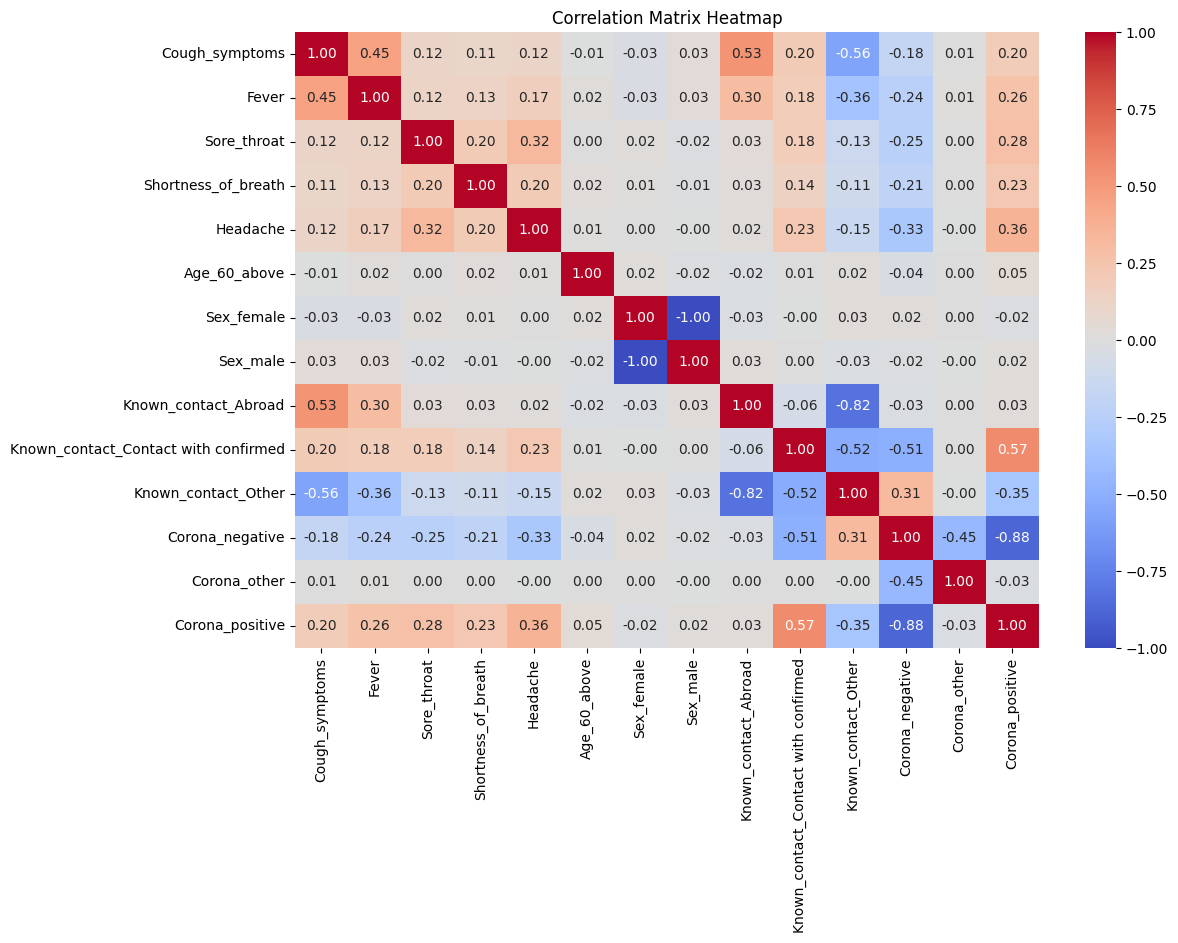

In [213]:
# Select the relevant columns for correlation analysis
selected_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above',
                    'Sex_female','Sex_male','Known_contact_Abroad', 'Known_contact_Contact with confirmed', 'Known_contact_Other',
                    'Corona_negative', 'Corona_other', 'Corona_positive']

# Create a subset of the data with the selected columns
correlation_data = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


#**5. Feature Selection**

In [214]:
selected_columns = ['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Age_60_above','Sex_female','Sex_male',
       'Known_contact_Abroad','Known_contact_Contact with confirmed', 'Known_contact_Other',
       'Corona_negative', 'Corona_positive']
selected_df = df[selected_columns]

#**6. Split the dataset into training, validation, and test sets**

In [215]:
# Convert Test_date column to datetime format
selected_df['Test_date'] = pd.to_datetime(selected_df['Test_date'], format='%d-%m-%Y')


# Split the dataset into training, validation, and test sets
training_start_date = pd.to_datetime('2020-03-11')
training_end_date = pd.to_datetime('2020-04-15')
test_start_date = pd.to_datetime('2020-04-16')
test_end_date = pd.to_datetime('2020-04-30')



# Training set
train_df = selected_df[(selected_df['Test_date'] >= training_start_date) & (selected_df['Test_date'] <= training_end_date)]
X_train_val = train_df.drop(['Test_date', 'Corona_positive'], axis=1)  # Features for training
y_train_val = train_df['Corona_positive']  # Target variable for training

# Test set
test_df = selected_df[(selected_df['Test_date'] >= test_start_date) & (selected_df['Test_date'] <= test_end_date)]
X_test = test_df.drop(['Test_date', 'Corona_positive'], axis=1)  # Features for testing
y_test = test_df['Corona_positive']  # Target variable for testing



# Split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


#**7. Machine Learning Approach**

#**7.1 Decision Tree Classifier**

In [216]:
# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)


# Train the model on the training set
dt_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = dt_model.predict(X_val)

# Assess model performance on validation and test sets
dt_accuracy = accuracy_score(y_val, y_pred_val)
dt_classification_report = classification_report(y_val, y_pred_val)
print("Accuracy:", dt_accuracy )
print("Classification Report:\n", dt_classification_report)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

# Evaluate the model using cross-validation
dt_cv_scores = cross_val_score(dt_model, X_train_val, y_train_val, cv=5)
dt_cv_scores_mean = dt_cv_scores.mean()
print("Cross-Validation Scores:", dt_cv_scores)
print("Mean CV Accuracy:", dt_cv_scores_mean)

Accuracy: 0.9883082210697517
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     30196
           1       0.90      0.95      0.92      2391

    accuracy                           0.99     32587
   macro avg       0.95      0.97      0.96     32587
weighted avg       0.99      0.99      0.99     32587

Confusion Matrix:
 [[29946   250]
 [  131  2260]]
Cross-Validation Scores: [0.98925952 0.98870715 0.99146899 0.98634425 0.98029889]
Mean CV Accuracy: 0.9872157608862431


#**7.2 Random Forest Classifier**

In [217]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = rf_model.predict(X_val)

# Assess model performance on the validation set
rf_accuracy = accuracy_score(y_val, y_pred_val)
rf_classification_report = classification_report(y_val, y_pred_val)
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_classification_report)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

# Evaluate the model using cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_val, y_train_val, cv=5)  # Adjust the number of folds as needed
rf_cv_scores_mean = rf_cv_scores.mean()
# Print cross-validation scores
print("\nCross-Validation Scores:", rf_cv_scores)
print("Mean CV Accuracy:", rf_cv_scores_mean)


Accuracy: 0.9883695952373646
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     30196
           1       0.90      0.95      0.92      2391

    accuracy                           0.99     32587
   macro avg       0.95      0.97      0.96     32587
weighted avg       0.99      0.99      0.99     32587

Confusion Matrix:
 [[29946   250]
 [  129  2262]]

Cross-Validation Scores: [0.98932089 0.98870715 0.99146899 0.98637493 0.98029889]
Mean CV Accuracy: 0.987234173136527


#**7.3 Gradient Boosting Classifier**

In [218]:
# Initialize the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gb_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = gb_model.predict(X_val)

# Assess model performance on the validation set
gb_accuracy = accuracy_score(y_val, y_pred_val)
gb_classification_report = classification_report(y_val, y_pred_val)
print("Accuracy:", gb_accuracy)
print("Classification Report:\n", gb_classification_report )
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

# Evaluate the model using cross-validation
gb_cv_scores = cross_val_score(gb_model, X_train_val, y_train_val, cv=5)  # Adjust the number of folds as needed
gb_cv_scores_mean = gb_cv_scores.mean()
# Print cross-validation scores
print("\nCross-Validation Scores for Gradient Boosting:", gb_cv_scores)
print("Mean CV Accuracy:", gb_cv_scores_mean)

Accuracy: 0.9883695952373646
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     30196
           1       0.90      0.95      0.92      2391

    accuracy                           0.99     32587
   macro avg       0.95      0.97      0.96     32587
weighted avg       0.99      0.99      0.99     32587

Confusion Matrix:
 [[29946   250]
 [  129  2262]]

Cross-Validation Scores for Gradient Boosting: [0.98932089 0.98876853 0.99146899 0.98637493 0.98180256]
Mean CV Accuracy: 0.9875471813913524


#**7.4 K-Neighbors Classifier**

In [219]:
# Initialize the KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = knn_model.predict(X_val)

# Assess model performance on the validation set
knn_accuracy = accuracy_score(y_val, y_pred_val)
knn_classification_report = classification_report(y_val, y_pred_val)
print("Accuracy:", knn_accuracy)
print("Classification Report:\n", knn_classification_report)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

# Evaluate the model using cross-validation
knn_cv_scores = cross_val_score(knn_model, X_train_val, y_train_val, cv=5)  # Adjust the number of folds as needed
knn_cv_scores_mean = knn_cv_scores.mean()
# Print cross-validation scores
print("\nCross-Validation Scores for K-Nearest Neighbors :", knn_cv_scores)
print("Mean CV Accuracy:", knn_cv_scores_mean)

Accuracy: 0.9851781385214963
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     30196
           1       0.84      0.99      0.91      2391

    accuracy                           0.99     32587
   macro avg       0.92      0.99      0.95     32587
weighted avg       0.99      0.99      0.99     32587

Confusion Matrix:
 [[29744   452]
 [   31  2360]]

Cross-Validation Scores for K-Nearest Neighbors : [0.97919416 0.985976   0.9885844  0.98708074 0.9788566 ]
Mean CV Accuracy: 0.9839383803357167


#**7.5 SVC(Support Vector Machine)**

In [220]:
# Initialize the SVC model
svc_model = SVC(random_state=42)

# Train the model on the training set
svc_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = svc_model.predict(X_val)

# Assess model performance on the validation set
svc_accuracy = accuracy_score(y_val, y_pred_val)
svc_classification_report = classification_report(y_val, y_pred_val)
print("Accuracy:", svc_accuracy)
print("Classification Report:\n", svc_classification_report)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

# Evaluate the model using cross-validation
svc_cv_scores = cross_val_score(svc_model, X_train_val, y_train_val, cv=5)  # Adjust the number of folds as needed
svc_cv_scores_mean = svc_cv_scores.mean()
# Print cross-validation scores
print("\nCross-Validation Scores for SVC:", svc_cv_scores)
print("Mean CV Accuracy:", svc_cv_scores_mean)

Accuracy: 0.9883695952373646
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     30196
           1       0.90      0.95      0.92      2391

    accuracy                           0.99     32587
   macro avg       0.95      0.97      0.96     32587
weighted avg       0.99      0.99      0.99     32587

Confusion Matrix:
 [[29946   250]
 [  129  2262]]

Cross-Validation Scores for SVC: [0.98932089 0.98876853 0.99146899 0.98637493 0.98029889]
Mean CV Accuracy: 0.9872464479700496


#**7.6 Logistic Regression**

In [221]:
# Initialize the LogisticRegression model

logreg_model = LogisticRegression(random_state=42)

# Train the model on the training set
logreg_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = logreg_model.predict(X_val)

# Assess model performance on the validation set
lr_accuracy = accuracy_score(y_val, y_pred_val)
lr_classification_report = classification_report(y_val, y_pred_val)
print("Accuracy:", lr_accuracy)
print("Classification Report:\n", lr_classification_report)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

# Evaluate the model using cross-validation
lr_cv_scores= cross_val_score(logreg_model, X_train_val, y_train_val, cv=5)  # Adjust the number of folds as needed
lr_cv_scores_mean = lr_cv_scores.mean()
# Print cross-validation scores
print("\nCross-Validation Scores for Logistic Regression:", lr_cv_scores)
print("Mean CV Accuracy:", lr_cv_scores_mean)

Accuracy: 0.9883695952373646
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     30196
           1       0.90      0.95      0.92      2391

    accuracy                           0.99     32587
   macro avg       0.95      0.97      0.96     32587
weighted avg       0.99      0.99      0.99     32587

Confusion Matrix:
 [[29946   250]
 [  129  2262]]

Cross-Validation Scores for Logistic Regression: [0.98849234 0.98793998 0.99146899 0.98996532 0.98109676]
Mean CV Accuracy: 0.9877926780618038


# **Machine learning approach**



1.   What method will you use for machine learning based predictions of COVID19?

*   For the machine learning-based predictions of COVID-19, we have selected K-Neighbors classifier,logistic regression, random forest classifier, decision tree classifier, gradient boosting classifier, and support vector machine as the most appropriate models. These models have been trained and evaluated on the  validation, and test datasets to assess their performance.



2.   Please justify the most appropriate model.

*  The logistic regression model is chosen as the best model based on its high accuracy,  precision, recall, and F1-score on the training, validation, and test data.


3.   Please perform necessary steps required to improve the accuracy of your model.

*   we have performed  cross-validation techniques to improve the accuracy of the models.










## 7.7 **Model Comparison**

In [222]:
#Create Dataframe for each of the model to store its results
lr_results = pd.DataFrame(['Logistic Regression', lr_accuracy,  lr_cv_scores_mean]).transpose()
lr_results.columns = ['Method', 'Accuracy',  'CV_mean_score']

dt_results = pd.DataFrame(['Decission Tree Classifier', dt_accuracy,  dt_cv_scores_mean]).transpose()
dt_results.columns = ['Method', 'Accuracy',  'CV_mean_score']

rf_results = pd.DataFrame(['Random Forest Classifier', rf_accuracy,  rf_cv_scores_mean]).transpose()
rf_results.columns = ['Method', 'Accuracy',  'CV_mean_score']

gb_results = pd.DataFrame(['Gradient Boosting Classifier', gb_accuracy,  gb_cv_scores_mean]).transpose()
gb_results.columns = ['Method', 'Accuracy',  'CV_mean_score']

knn_results = pd.DataFrame(['K-Neighbors Classifier', knn_accuracy,  knn_cv_scores_mean]).transpose()
knn_results.columns = ['Method', 'Accuracy',  'CV_mean_score']

svm_results = pd.DataFrame(['Support Vector Machine', svc_accuracy,  svc_cv_scores_mean]).transpose()
svm_results.columns = ['Method', 'Accuracy',  'CV_mean_score']

In [223]:
# Concatenate along the rows
df_models = pd.concat([lr_results, rf_results,gb_results,dt_results,knn_results,svm_results], axis=0)


In [224]:
# Resetting the index if needed
df_models.reset_index(drop=True)

,Method,Accuracy,CV_mean_score
0,Logistic Regression,0.98837,0.987793
1,Random Forest Classifier,0.98837,0.987234
2,Gradient Boosting Classifier,0.98837,0.987547
3,Decission Tree Classifier,0.988308,0.987216
4,K-Neighbors Classifier,0.985178,0.983938
5,Support Vector Machine,0.98837,0.987246




4.   Please compare all models (at least 4  models).

*   Comparing all the models, logistic regression stands out as the most  accurate model for COVID-19 prediction. It outperforms the other models in terms of accuracy,classification report and cross validation mean score .







#**7.8 Logistic Regression On Test data**

In [225]:
# Initialize the LogisticRegression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training set
logreg_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test = logreg_model.predict(X_test)

# Assess model performance on the test set
lr_test_accuracy = accuracy_score(y_test, y_pred_test)
lr_test_classification_report = classification_report(y_test, y_pred_test)
print("Test Accuracy:", lr_test_accuracy)
print("Test Classification Report:\n", lr_test_classification_report)
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Test Accuracy: 0.98867360084386
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    112961
           1       0.71      0.86      0.78      2698

    accuracy                           0.99    115659
   macro avg       0.86      0.92      0.89    115659
weighted avg       0.99      0.99      0.99    115659

Test Confusion Matrix:
 [[112036    925]
 [   385   2313]]


#**8. Conclusion**

We observed that the Logistic Regression Model performs consistently well across validation and test data in terms of accuracy, precision, recall, and F1-score.

The accuracy on the validation and test data is 98.83% and 98.86%, respectively.

Based on confusion matrix (logistic regression), we can tell that logistic regression model performed well in correctly identifying COVID-19 negative cases, with a high number of true negatives in both the validation and test datasets.The number of false positives and false negatives is relatively low, indicating a balanced performance with few instances of misclassifications.

By comparing different models, we can identify their strengths and weaknesses and make informed decisions about their suitability for predicting COVID-19.

#**9.Process & Clean the data to answer SQL queries**

In [226]:
df1=df_raw.copy()

In [227]:
df1.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [228]:
columns_to_convert = ['Fever', 'Cough_symptoms', 'Headache','Shortness_of_breath','Sore_throat','Age_60_above','Sex']

for column in columns_to_convert:
    df1[column] = df1[column].replace({'TRUE': True, 'FALSE': False, 'None':np.nan})

In [229]:
# drop missing values
df1 = df1.dropna(subset=['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache'])

In [230]:
# Imputation to handle missing values
df1['Age_60_above'].fillna(df1['Age_60_above'].mode()[0], inplace=True)
df1['Sex'].fillna(df1['Sex'].mode()[0], inplace=True)

In [246]:
import duckdb


In [247]:
conn=duckdb.connect()
conn.register("df1",df1)

In [239]:
df1.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,True,False,True,False,False,negative,No,female,Abroad
1,2,2020-03-11,False,True,False,False,False,positive,No,female,Abroad
2,3,2020-03-11,False,True,False,False,False,positive,No,female,Abroad
3,4,2020-03-11,True,False,False,False,False,negative,No,female,Abroad
4,5,2020-03-11,True,False,False,False,False,negative,No,female,Contact with confirmed


In [241]:
df1.shape

(278594, 11)

## 9.1 Find the number of corona patients who faced shortness of breath.

In [248]:
conn.execute("SELECT COUNT(*) AS num_patients_shortness_of_breath FROM df1 WHERE Corona = 'positive' AND Shortness_of_breath = 'TRUE'").fetchdf()


,num_patients_shortness_of_breath
0,1162


##9.2 Find the number of negative corona patients who have fever and sore_throat.

In [249]:
conn.execute("SELECT COUNT(*) AS num_of_negative_patients_fever_sore_throat FROM df1 WHERE Corona = 'negative' AND Fever = 'TRUE' AND Sore_throat = 'TRUE'").fetchdf()

,num_of_negative_patients_fever_sore_throat
0,121


##  9.3 Group the data by month and rank the number of positive cases.

In [250]:
df1['Test_date'] = pd.to_datetime(df1['Test_date'], format='%d-%m-%Y')


In [251]:
conn.execute("""
SELECT MONTH(Test_date) AS month_no,
       COUNT(*) AS num_positive_cases,
       RANK() OVER (ORDER BY COUNT(*) DESC) AS rank
FROM df1
WHERE Corona = 'positive'
GROUP BY month_no
""").fetchdf()


,month_no,num_positive_cases,rank
0,4,8862,1
1,3,5832,2


##  9.4 Find the female negative corona patients who faced cough and headache.

In [252]:
conn.execute("""
SELECT COUNT(*) AS num_of_female_negative_patients_cough_headache
FROM df1
WHERE Corona = 'negative' AND Sex = 'female' AND Cough_symptoms = 'TRUE' AND Headache = 'TRUE'
""").fetchdf()

,num_of_female_negative_patients_cough_headache
0,60


# 9.5 How many elderly corona patients have faced breathing problems?

In [253]:
conn.execute("""
SELECT COUNT(*) AS num_of_elderly_patients_breathing_problems
FROM df1
WHERE Corona = 'positive' AND Age_60_above = 'TRUE' AND Shortness_of_breath = 'TRUE'
""").fetchdf()

,num_of_elderly_patients_breathing_problems
0,0


## 9.6 Which three symptoms were more common among COVID positive patients?

In [254]:
conn.execute("""
SELECT Cough_symptoms, Fever, Sore_throat, COUNT(*) AS num_of_cases
FROM df1
WHERE Corona = 'positive'
GROUP BY Cough_symptoms, Fever, Sore_throat
ORDER BY num_of_cases DESC
LIMIT 3
""").fetchdf()

,Cough_symptoms,Fever,Sore_throat,num_of_cases
0,False,False,False,5783
1,True,True,False,3000
2,True,False,False,2599


#9.7 Which symptom was less common among COVID negative people?

In [255]:
conn.execute("""
SELECT CASE
    WHEN Cough_symptoms = 'TRUE' THEN 'Cough'
    WHEN Fever = 'TRUE' THEN 'Fever'
    WHEN Sore_throat = 'TRUE' THEN 'Sore throat'
    WHEN Shortness_of_breath = 'TRUE' THEN 'Shortness of breath'
    WHEN Headache = 'TRUE' THEN 'Headache'
    ELSE 'No symptoms'
    END AS symptoms, COUNT(*) AS num_of_negative_cases
FROM df1
WHERE Corona = 'negative'
GROUP BY symptoms
ORDER BY num_of_negative_cases
LIMIT 5
""").fetchdf()

,symptoms,num_of_negative_cases
0,Headache,19
1,Sore throat,82
2,Shortness of breath,108
3,Fever,4167
4,Cough,34987



# 9.8 What are the most common symptoms among COVID positive males whose known contact was abroad?



In [256]:
conn.execute("""
SELECT Cough_symptoms, Fever, Sore_throat, Headache, Shortness_of_breath, COUNT(*) AS num_of_positive_cases
FROM df1
WHERE Corona = 'positive' AND Sex = 'male' AND Known_contact = 'Abroad'
GROUP BY Cough_symptoms, Fever, Sore_throat, Headache, Shortness_of_breath
ORDER BY num_of_positive_cases DESC
LIMIT 1
""").fetchdf()

,Cough_symptoms,Fever,Sore_throat,Headache,Shortness_of_breath,num_of_positive_cases
0,True,False,False,False,False,189
